In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Frequency Domain Analysis - Filtering

In this task, we will implement high-pass, low-pass, and band-reject filters using frequency domain analysis.

In [1]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-rk7mmntm
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=dd5df2dc86cc6a4315b3d550fb4a0b97cc95215eaf0f6ec5a97a25dc7ccf3675
  Stored in directory: /tmp/pip-ephem-wheel-cache-f5uwd44h/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-rk7mmntm


In [38]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle as circ

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=2) # download data for this assignment

Download Complete!


In [39]:
def getFrequencyDomainSignal(img):
    '''
    Write a program to extract magnitude and phase spectrum of the input image
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Outputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    mag_spectrum = np.abs(dft_shift)
    phase_spectrum = np.angle(dft_shift)
    
    #############################
    # End your code here ########
    ############################# 
    
    return mag_spectrum, phase_spectrum

In [41]:
def reconstruction(mag_spectrum, phase_spectrum):
    '''
    Write a program to reconstruct the original image using its magnitude and phase spectrum
    
    Inputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Outputs:
    + out_img - reconstructed image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    back = np.multiply(np.abs(mag_spectrum), np.exp(1j*phase_spectrum))
    
    back_ishift = np.fft.ifftshift(back)
    img_back = np.real(np.fft.ifft2(back_ishift))
    out_img = np.abs(img_back)

    min, max = np.amin(out_img, (0,1)), np.amax(out_img, (0,1))
    out_img = cv2.normalize(out_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    #############################
    # End your code here ########
    ############################# 
    
    return out_img

In [43]:
def applyLPF(img, fc):
    '''
    Write a program to apply an ideal low pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    mag_s , phase_s = getFrequencyDomainSignal(img)
    
    N = mag_s.shape[0]
    mask_arr = np.zeros_like(mag_s)
    radius, centre = circ(int(N/2), int(N/2), fc)
    mask_arr[radius, centre] = 1
    
    new_mag_s = np.multiply(mask_arr, mag_s)
    
    out_img = reconstruction(new_mag_s, phase_s)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [45]:
def applyHPF(img, fc):
    '''
    Write a program to apply an ideal high pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    mag_s , phase_s = getFrequencyDomainSignal(img)
    
    N = mag_s.shape[0]
    mask_arr = np.ones_like(mag_s)
    radius, centre = circ(int(N/2), int(N/2), fc)
    mask_arr[radius, centre] = 0
    
    new_mag_s = np.multiply(mask_arr, mag_s)
    
    out_img = reconstruction(new_mag_s, phase_s)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [46]:
def applyBandRejectFilter(img, fL, fH):
    '''
    Write a program to apply an ideal band reject filter (having cutoff frequency at 'fL' and 'fH')
    to the input image. You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fL & fH - cutoff frequency 
              - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    mag_s , phase_s = getFrequencyDomainSignal(img)
    mask_arr = np.zeros_like(mag_s)

    N = mag_s.shape[0]
    mask_arr1 = np.zeros_like(mag_s)
    mask_arr2 = np.ones_like(mag_s)
    radius1, centre1 = circ(int(N/2), int(N/2), fL)
    radius2, centre2 = circ(int(N/2), int(N/2), fH)
    mask_arr1[radius1, centre1] = 1
    mask_arr2[radius2, centre2] = 0

    mask_arr = mask_arr1 + mask_arr2 
    
    new_mag_s = np.multiply(mask_arr, mag_s)
    
    out_img = reconstruction(new_mag_s, phase_s)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [47]:
# Do not change codes inside this cell

lena_noisy = cv2.imread('data/lena_noisy.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

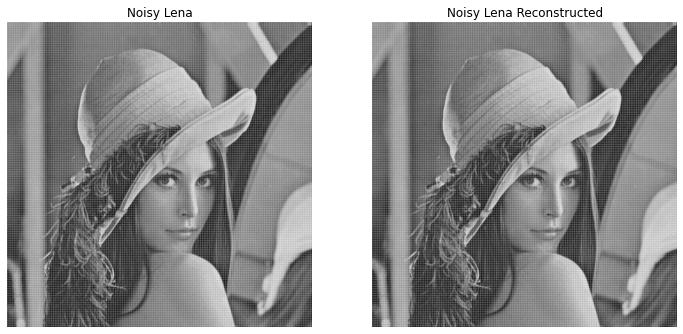

In [48]:
# Test getFrequencyDomainSignal() and reconstruction()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)
lena_reconstructed = reconstruction(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, lena_noisy, "Noisy Lena")
plot_frame(1, 2, 1, lena_reconstructed, "Noisy Lena Reconstructed")

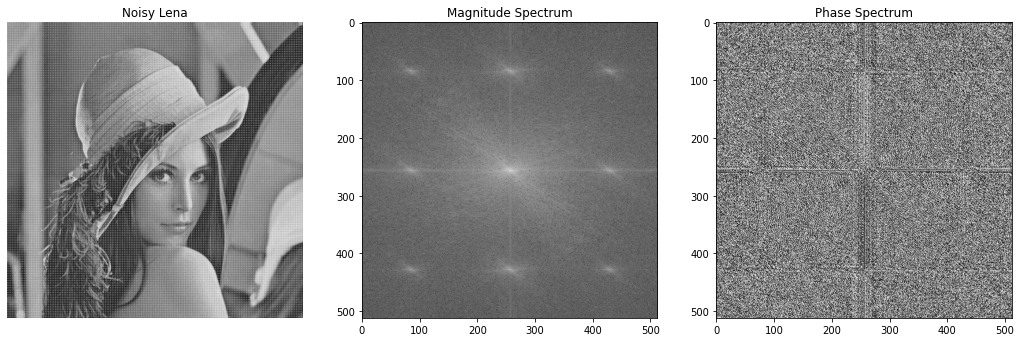

In [49]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, lena_noisy, "Noisy Lena")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

### Find suitable fL and fH for band reject filter

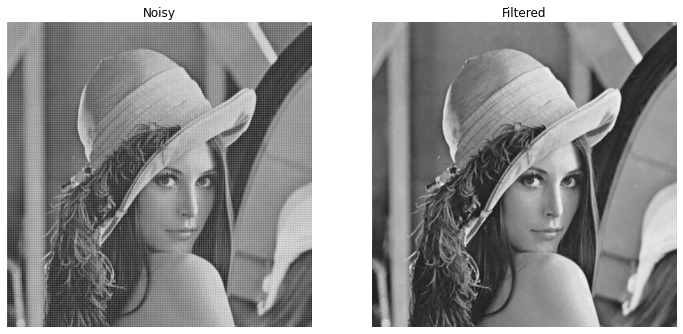

In [50]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work

def plot_BRF_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(lena_noisy.shape[0]/2)
        
    lena_filtered = applyBandRejectFilter(lena_noisy, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, lena_noisy, "Noisy")
    plot_frame(1, 2, 1, lena_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
fL = 150
fH = 250

plot_BRF_output(fL, fH)

### Observations

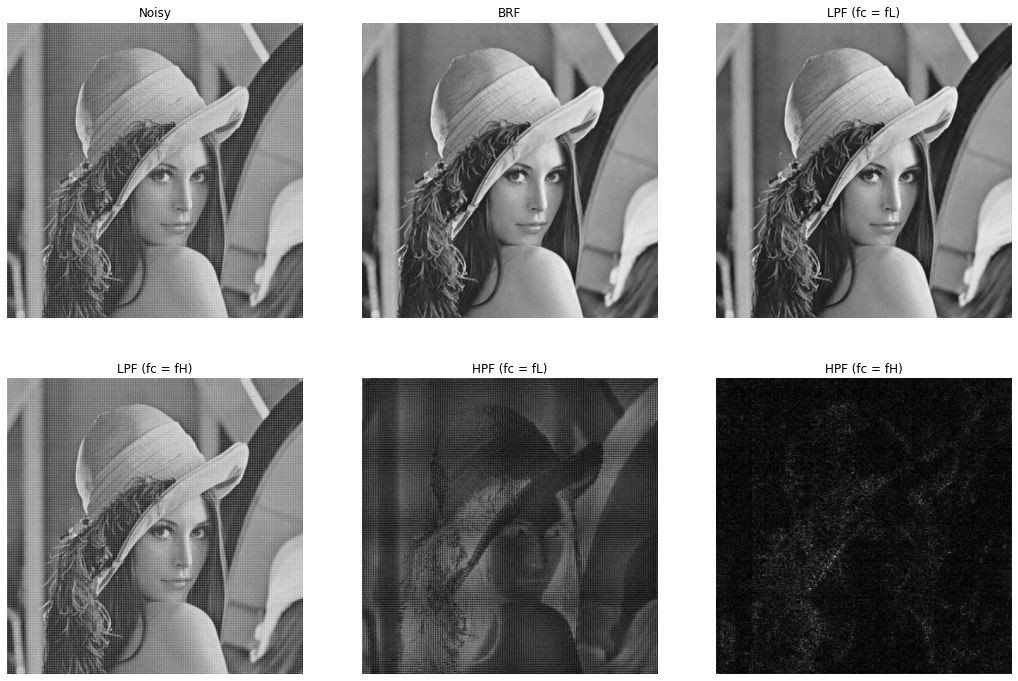

In [51]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(2, 3, 0, lena_noisy, "Noisy")

tmp = applyBandRejectFilter(lena_noisy, fL, fH)
plot_frame(2, 3, 1, tmp, "BRF")

tmp = applyLPF(lena_noisy, fL)
plot_frame(2, 3, 2, tmp, "LPF (fc = fL)")

tmp = applyLPF(lena_noisy, fH)
plot_frame(2, 3, 3, tmp, "LPF (fc = fH)")

tmp = applyHPF(lena_noisy, fL)
plot_frame(2, 3, 4, tmp, "HPF (fc = fL)")

tmp = applyHPF(lena_noisy, fH)
plot_frame(2, 3, 5, tmp, "HPF (fc = fH)")

In [52]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
Clearly, Band Reject Filter and Low-Pass Filter when fC = fL works best for this image. Others simply, ruin the image.
"""

print(your_observation)


Clearly, Band Reject Filter and Low-Pass Filter when fC = fL works best for this image. Others simply, ruin the image.

